## Epochs

Dans la bibliothèque MNE-Python, un "époch" fait référence à un intervalle de temps spécifique de données EEG en continu qui est extrait pour une analyse ultérieure.

Le concept d'époques est particulièrement pertinent lorsqu'il s'agit de potentiels liés à des événements (ERPs) ou de champs liés à des événements (ERFs) dans l'analyse des données EEG.

Les épochs permettent de nous concentrer sur des segments de données spécifiques autour des événements d'intérêt.

In [40]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from utils import preprocess_data
import glob
import numpy as np
import matplotlib.pyplot as plt

# Set the default figure size for all matplotlib plots (including MNE plots)
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
files = glob.glob('../files/S001/*.edf')
files.sort()

In [6]:
'''
=========  ===================================
run        task
=========  ===================================
1          Baseline, eyes open
2          Baseline, eyes closed
3, 7, 11   Motor execution: left vs right hand
4, 8, 12   Motor imagery: left vs right hand
5, 9, 13   Motor execution: hands vs feet
6, 10, 14  Motor imagery: hands vs feet
=========  ===================================
'''
raws = []

for i in [5, 9, 13]:
    current_file = files[i]
    r = read_raw_edf(current_file, preload=True, stim_channel='auto')
    events, _ = mne.events_from_annotations(r)
    if i in [5, 9, 13]:
        new_labels_events = {1:'rest', 2:'action_hand', 3:'action_feet'} # action
    new_annot = mne.annotations_from_events(events=events, event_desc=new_labels_events, sfreq=r.info['sfreq'], orig_time=r.info['meas_date'])
    r.set_annotations(new_annot)
    raws.append(r)
    
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


In [ ]:
raw_obj, event, event_dict, picks, _ = preprocess_data(raw_obj)

In [12]:
tmin = -0.5  # Time before event in seconds
tmax = 4  # Time after event in seconds
epochs = mne.Epochs(raw_obj, events, event_dict, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 721 original time points ...
1 bad epochs dropped


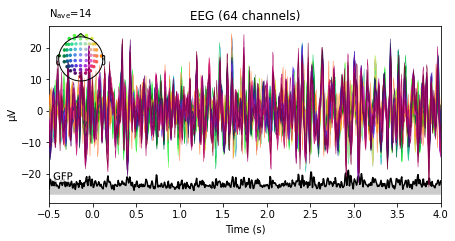

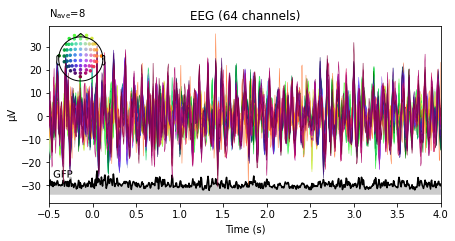

''

In [41]:
evoked_non = epochs['action_hand'].average()
evoked_non.plot(spatial_colors=True, gfp=True, time_unit='s')
evoked_target = epochs['action_feet'].average()
evoked_target.plot(spatial_colors=True, gfp=True, time_unit='s')
;

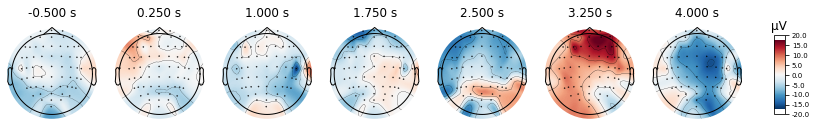

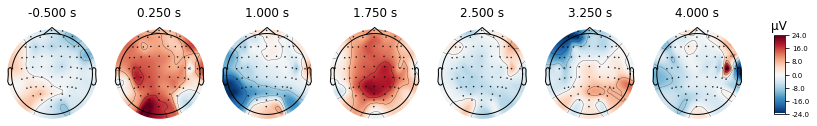

''

In [42]:
times = np.linspace(-0.5, 4, 7)
evoked_non.plot_topomap(ch_type='eeg', times=times, colorbar=True)
evoked_target.plot_topomap(ch_type='eeg', times=times, colorbar=True)
;

No projector specified for this dataset. Please consider the method self.add_proj.


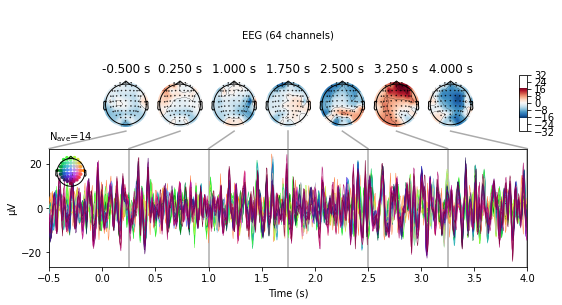

No projector specified for this dataset. Please consider the method self.add_proj.


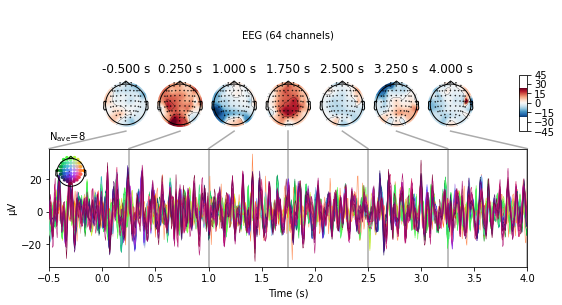

''

In [35]:
evoked_non.plot_joint(times=times)
evoked_target.plot_joint(times=times)
;

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


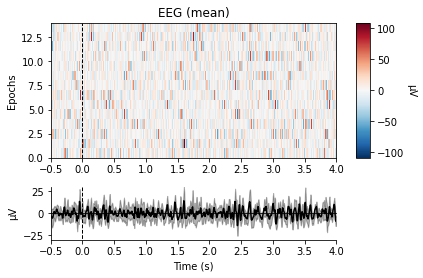

Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


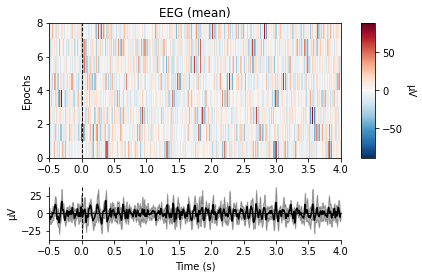

''

In [37]:
epochs['action_hand'].plot_image(picks='eeg', combine='mean')
epochs['action_feet'].plot_image(picks='eeg', combine='mean')
;

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


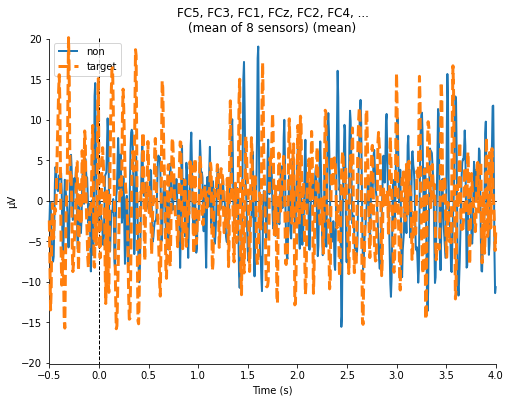

More than 6 channels, truncating title ...
combining channels using "median"
combining channels using "median"


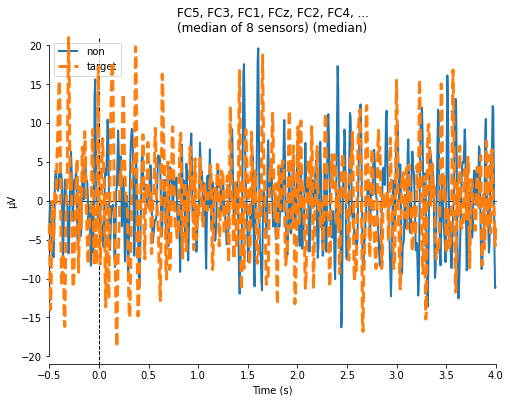

combining channels using "gfp"
combining channels using "gfp"


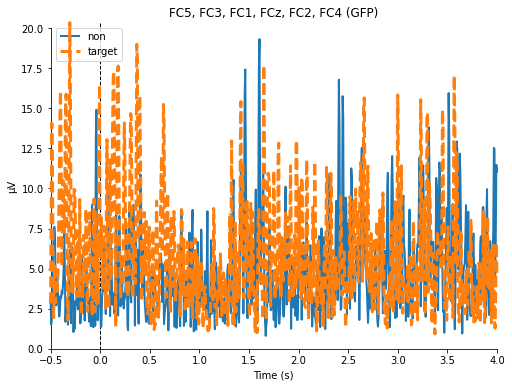

More than 6 channels, truncating title ...
combining channels using "<function custom_func at 0x13ccaa8b0>"
combining channels using "<function custom_func at 0x13ccaa8b0>"


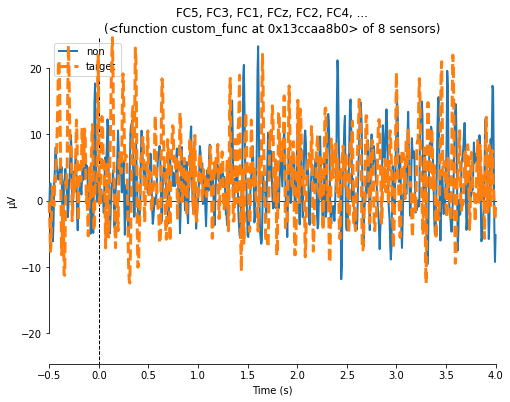

In [19]:
def custom_func(x):
    return x.max(axis=1)

total_evoked = {"non": evoked_non, "target": evoked_target}
for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(total_evoked, picks=[0,1,2,3,4,5,6,7], combine=combine,
                                colors=dict(non=0, target=1),
                                linestyles=dict(non='solid', target='dashed'),
                                 styles=dict(non=dict(linewidth=2),target=dict(linewidth=3))) 

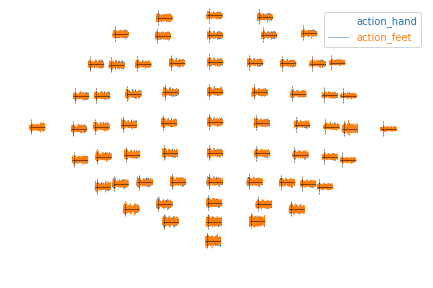

''

In [38]:
evokeds = [epochs[name].average() for name in ('action_hand', 'action_feet')]
mne.viz.plot_evoked_topo(evokeds, layout_scale=1)
;